In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
from sklearn import datasets


iris = datasets.load_iris()

data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [262]:
clf_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [251]:
y_pred = clf_model.predict(X_test)

In [252]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [253]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [291]:
target = str(np.unique(data))
feature_names = X.columns

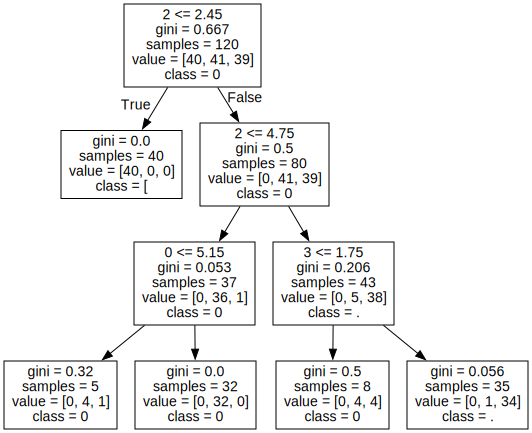

In [292]:
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=target)
graph = graphviz.Source(dot_data)
graph

In [293]:
importances = clf_model.feature_importances_
importances

array([0.00477559, 0.        , 0.95526951, 0.0399549 ])

In [294]:
sorted_importances = pd.DataFrame({'data': list(X_train.columns),
                                  'importances': clf_model.feature_importances_}).sort_values('importances', ascending=False)
sorted_importances

,data,importances
2,2,0.955270
3,3,0.039955
0,0,0.004776
1,1,0.000000
